# **Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2024-05-23 08:28:43.785789: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 08:28:43.785887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 08:28:43.922379: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Import Images**

In [3]:
# Define directories
train_dir = '/kaggle/input/melanoma-cancer-dataset/train'
test_dir = '/kaggle/input/melanoma-cancer-dataset/test'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Flow from directory for testing
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# **Sample Training Images**

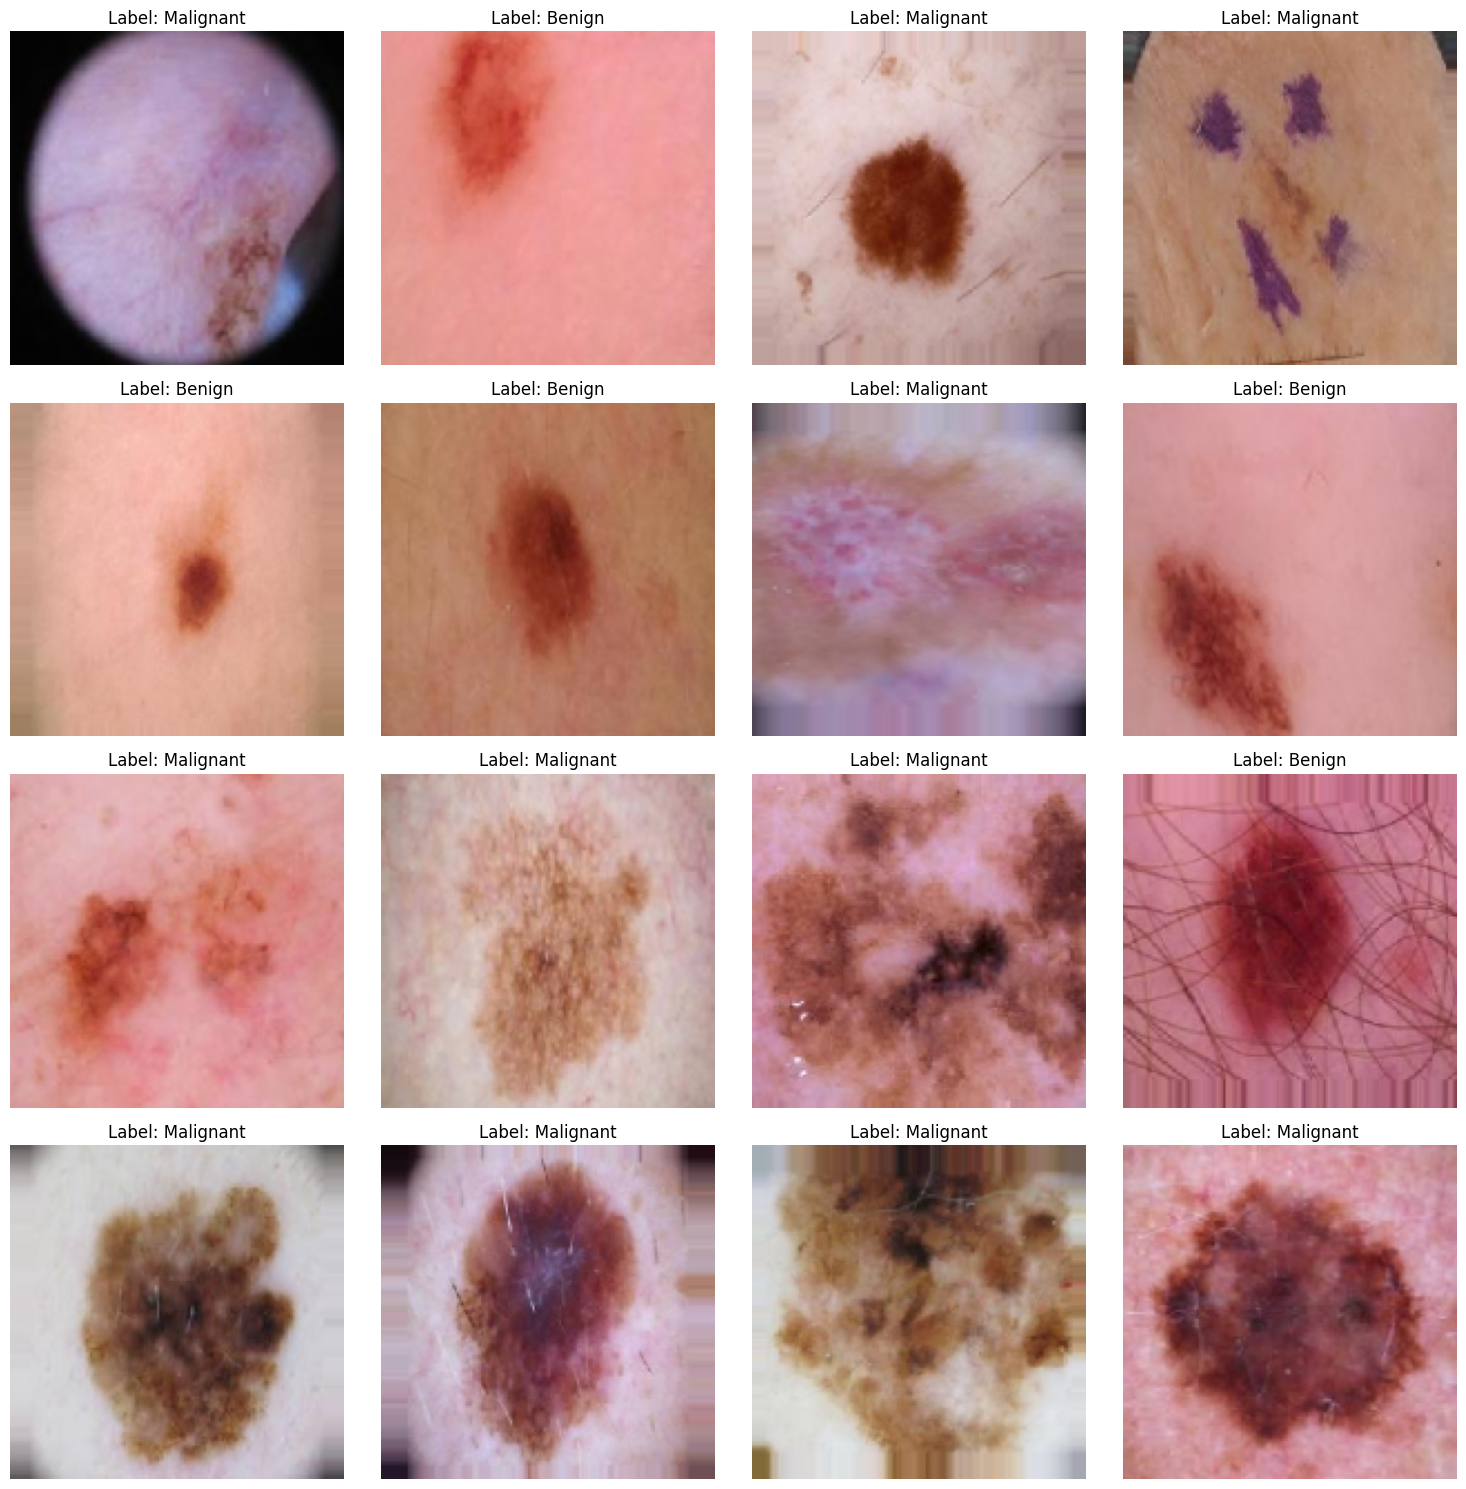

In [14]:
# Get a batch of training images and labels
train_images, train_labels = next(train_generator)

# Define class labels
class_labels = list(train_generator.class_indices.keys())

# Plot the training images with their labels
plt.figure(figsize=(15, 15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_images[i])
    label = class_labels[int(train_labels[i])]
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Model Creation**

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping]
)

Epoch 1/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 79s 197ms/step - accuracy: 0.6614 - loss: 0.6619 - val_accuracy: 0.6431 - val_loss: 0.7078
Epoch 2/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 0.4909 - val_accuracy: 0.5625 - val_loss: 0.7434
Epoch 3/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 70s 186ms/step - accuracy: 0.8058 - loss: 0.5097 - val_accuracy: 0.8024 - val_loss: 0.3954
Epoch 4/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.9062 - loss: 0.3270 - val_accuracy: 0.5000 - val_loss: 0.8264
Epoch 5/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 71s 187ms/step - accuracy: 0.8176 - loss: 0.7350 - val_accuracy: 0.6754 - val_loss: 0.5291
Epoch 6/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - accuracy: 0.7500 - loss: 0.5238 - val_accuracy: 0.5625 - val_loss: 0.6609
Epoch 7/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 71s 187ms/step - accuracy: 0.8151 - loss: 0.4778 - val_accuracy: 0.8049 - val_loss: 0.4030
Epoch 8/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7500 - loss: 0.5635 - 

# **Model Evaluation & Graph**

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8573 - loss: 0.3525
Test Accuracy: 85.79%


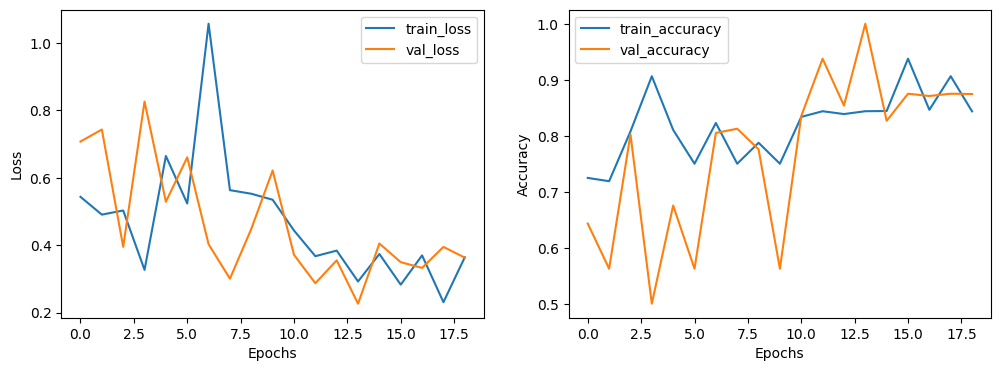

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# **Show Sample Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


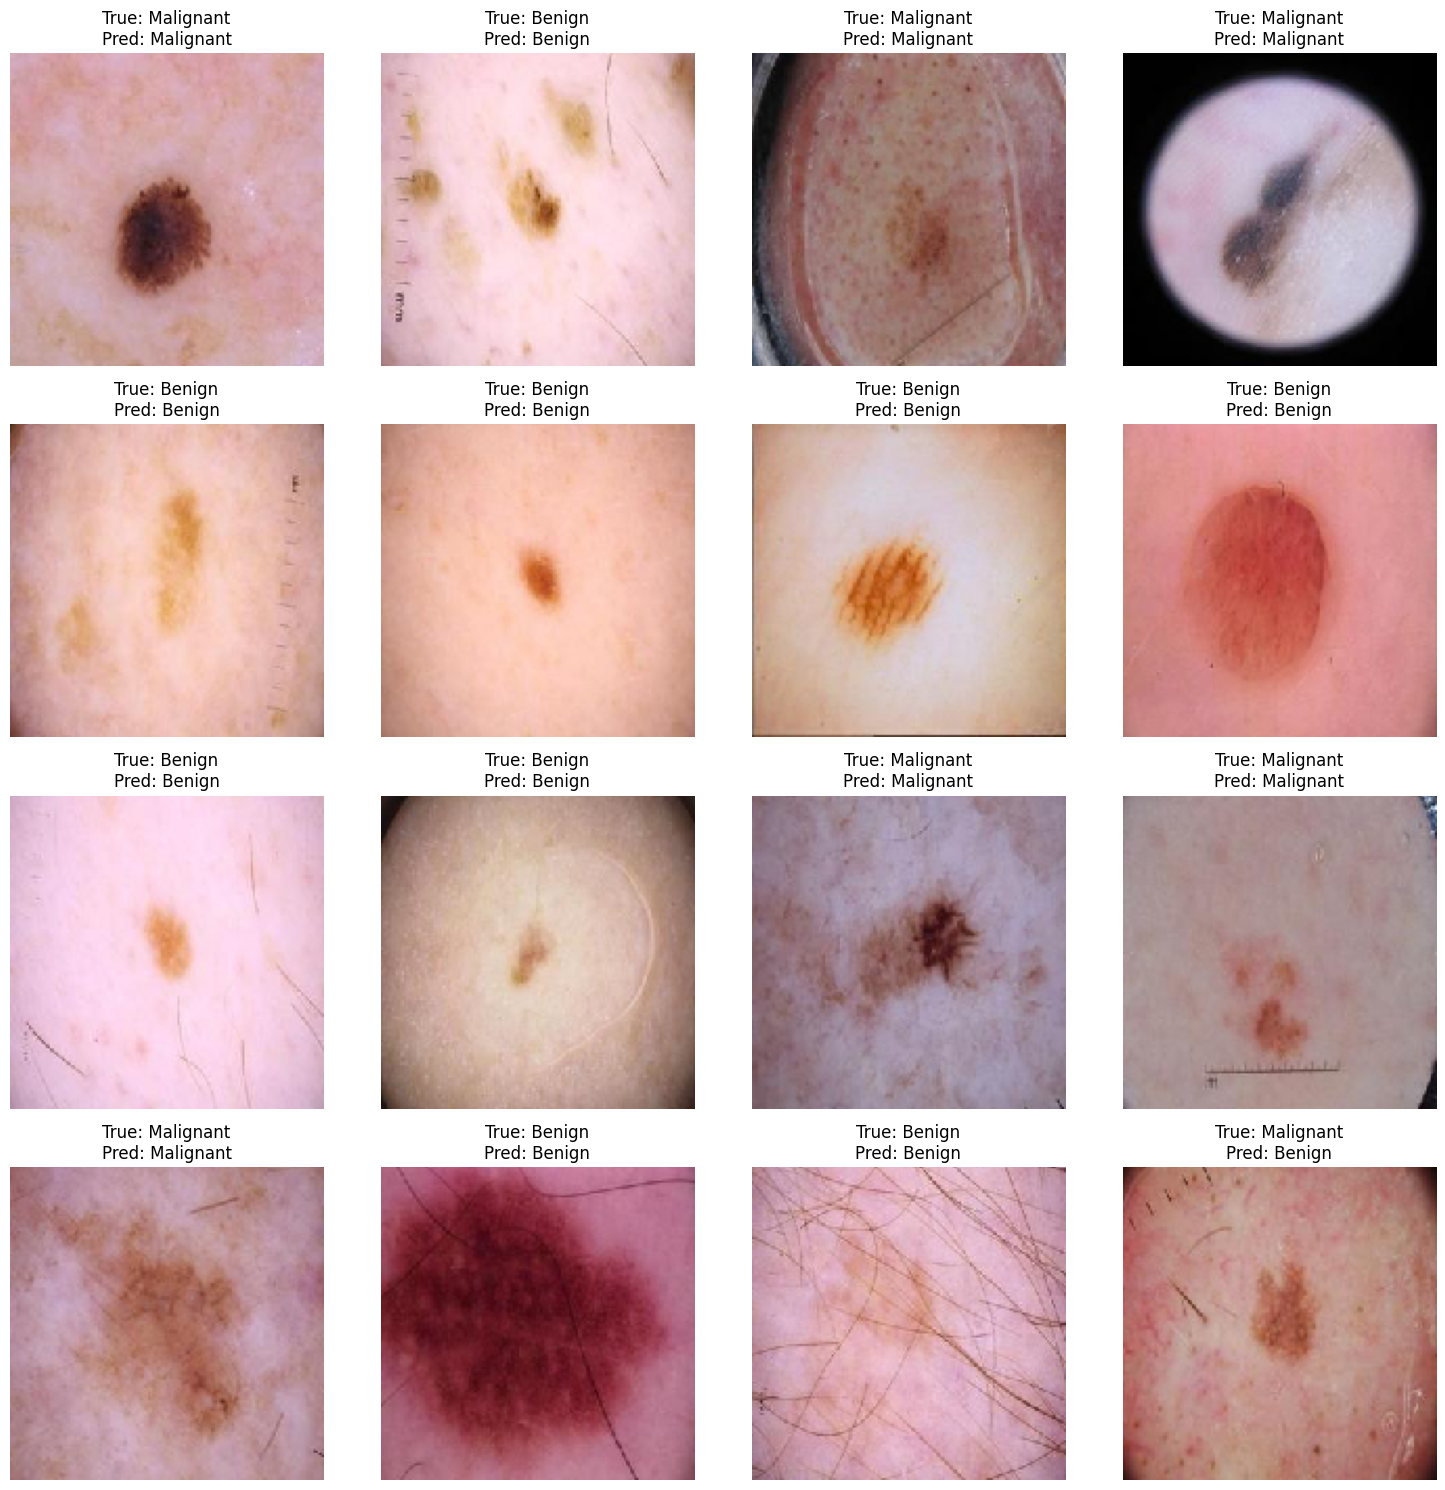

In [13]:
test_images, test_labels = next(test_generator)

# Predict using the model
predictions = model.predict(test_images)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Define class labels
class_labels = list(test_generator.class_indices.keys())

# Plot the images with true and predicted labels
plt.figure(figsize=(15, 15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_images[i])
    true_label = class_labels[int(test_labels[i])]
    predicted_label = class_labels[predicted_labels[i]]
    plt.title(f'True: {true_label}\nPred: {predicted_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()